In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, diff

In [3]:
def f(x):
    return 2*x[0]**2 + x[0]*x[1] + x[1]**2 - 3*x[0]

In [4]:
x1, x2 = symbols('x1, x2')
f_sy = 2*x1**2 + x1*x2 +x2**2 - 3*x1

In [10]:
def find_grad(f, x):
    df_dx1 = diff(f, x1).subs({x1: x[0], x2: x[1]})
    df_dx2 = diff(f, x2).subs({x1: x[0], x2: x[1]})
    df = np.array([df_dx1, df_dx2], dtype=float)
    return df

In [6]:
def norma(x):
    y = 0
    for i, x_i in enumerate(x):
        y += (x_i**2)
    y = math.sqrt(y)
    return y

In [7]:
#x = np.random.rand(2)
x = np.array([-3.7, 1.6])
x_s = np.zeros(x.shape)
x_history = []

x_history.append(x) 

print("Initial values of x and f(x)")
print("\tx: " + str(x))
print("\tf(x): " + str(f(x)))

Initial values of x and f(x)
	x: [-3.7  1.6]
	f(x): 35.120000000000005


In [8]:
def SGD(w, lr, grad):
    return w - lr*grad


def SGD_momentum(w, lr, grad, v, mu):
    v_next = mu*v + grad
    w_next = w - lr*v
    return w_next, v_next


def Adagrad(w, lr, grad, acc):
    acc_next = acc + grad**2
    w_next = w - grad/(np.sqrt(acc_next) + 1e-10)
    return w_next, acc_next

In [9]:
def lr_scheduler(gamma, step_size, lr, epoch):
    if epoch % step_size == 0:
        return lr * gamma
    return lr

In [11]:
MU = 0.1
GAMMA = 0.5
LR_STEP_SIZE = 5
lr = 0.1
epoches = 200
eps = 1e-1
eps1 = 1e-3
eps2 = 1e-3
v = np.zeros_like(x)
acc = np.zeros_like(x)

for epoch in range(epoches):
    grad = find_grad(f_sy, x)
    if norma(grad) < eps1:
        x_s = x
        break
    
    new_x = SGD(x, lr, grad)        
    #new_x, v = SGD_momentum(x, lr, grad, v, MU)
    #new_x, acc = Adagrad(x, lr, grad, acc)
    
    #lr = lr_scheduler(GAMMA, LR_STEP_SIZE, lr, epoch + 1)
    
    if (epoch == 0):
        old_x = x
    else:
        Dx_k = norma(new_x - x)
        Df_k = math.sqrt((f(new_x) - f(x))**2)
        Dx_km1 = norma(x - old_x)
        Df_km1 = math.sqrt((f(x) - f(old_x))**2)
        
        condition_k = (Dx_k < eps2) & (Df_k < eps2)
        condition_km1 = (Dx_km1 < eps2) & (Df_km1 < eps2)
        
        if (condition_k == True) & (condition_km1 == True):
            x_s = new_x
            break
        else:
            old_x = x
            x = new_x
            x_history.append(new_x)
            print("epoch: " + str(epoch))
            print("\tx: " + str(new_x))
            print("\tf(x): " + str(f(new_x)))

epoch: 1
	x: [-2.08  1.65]
	f(x): 14.183300000000001
epoch: 2
	x: [-1.113  1.528]
	f(x): 6.450658000000001
epoch: 3
	x: [-0.5206  1.3337]
	f(x): 3.18828019
epoch: 4
	x: [-0.14573  1.11902]
	f(x): 1.5687954415999998
epoch: 5
	x: [0.10066  0.909789]
	f(x): 0.6375802564609999
epoch: 6
	x: [0.2694171 0.7177652]
	f(x): 0.04548494854078011
epoch: 7
	x: [0.38987374 0.54727045]
	f(x): -0.3527468311406394
epoch: 8
	x: [0.4791972  0.39882899]
	f(x): -0.6281493928961104
epoch: 9
	x: [0.54763542 0.27114347]
	f(x): -0.8210906057550654
epoch: 10
	x: [0.60146691 0.16215123]
	f(x): -0.9570542169794157
epoch: 11
	x: [0.64466502 0.0695743 ]
	f(x): -1.0531163865077102
epoch: 12
	x: [ 0.67984158 -0.00880707]
	f(x): -1.1210654377071116
epoch: 13
	x: [ 0.70878566 -0.07502981]
	f(x): -1.1691533366817004
epoch: 14
	x: [ 0.73277437 -0.13090241]
	f(x): -1.2031930482258337
epoch: 15
	x: [ 0.75275487 -0.17799937]
	f(x): -1.2272909371173628
epoch: 16
	x: [ 0.76945286 -0.21767498]
	f(x): -1.2443514115066234
epoch: 

In [12]:
new_x_history = np.array(x_history)

x1 = new_x_history[:, 0]
x2 = new_x_history[:, 1]

xp1 = np.linspace(-x1[x1.size - 1] * 5, x1[x1.size - 1] * 5, 100)
xp2 = np.linspace(-x2[x2.size - 1] * 5, x2[x2.size - 1] * 5, 100)
mse_vals = np.zeros(shape=(xp1.size, xp2.size))

In [13]:
for i, value1 in enumerate(xp1):
    for j, value2 in enumerate(xp2):
        x_temp = np.array([value1, value2])
        mse_vals[i, j] = f(x_temp)

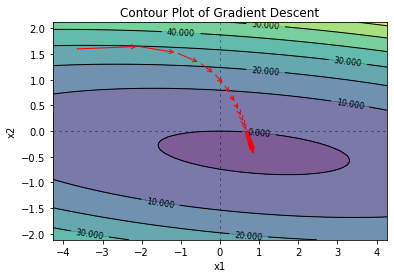

In [14]:
plt.contourf(xp1, xp2, mse_vals, alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
for i in range(len(new_x_history) - 1):
    plt.annotate('', xy=new_x_history[i + 1, :], xytext=new_x_history[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
CS = plt.contour(xp1, xp2, mse_vals, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [15]:
print("x*: " + str(x_s))
print("f(x*): " + str(f(x_s)))

x*: [ 0.85549527 -0.42459381]
f(x*): -1.285699588639042
